In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

In [3]:
business_data = pd.read_csv('olist_closed_deals_dataset.csv')

In [4]:
customer_data = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
product_data = pd.read_csv('olist_products_dataset.csv')

## IMPORTING AND MERGING DATASETS BASED ON COMMON COLUMNS
### SUCH AS SELLER_ID, PRODUCT_ID,PRODUCT_CATEGORY_NAME,ORDER_ID 

In [6]:
customer_business_data = pd.merge(business_data,customer_data)
# basis on seller_id

In [7]:
product_customer_business_data = pd.merge(product_data,customer_business_data)
#basis on product_id

In [8]:
english_name = pd.read_csv('product_category_name_translation.csv')
total_data = pd.merge(product_customer_business_data,english_name)
#basis on product_category_name

In [9]:
review_data = pd.read_csv('olist_order_reviews_dataset.csv')
payment_data = pd.read_csv('olist_order_payments_dataset.csv')
total_data = pd.merge(total_data,review_data)
#basis on order_id 
total_data = pd.merge(total_data,payment_data)
#basis on order_id 

### In order to see how the overall data looks like after concatenation of all relevant datasets from Olist :

In [10]:
total_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,mql_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2fdef625a264874c1a4081ca24dd479d,...,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,1,debit_card,1,18.30
1,28e410092e56a080e14595c053d0bbe8,perfumaria,45.0,416.0,1.0,200.0,16.0,16.0,16.0,e0bcbf50b9afa71ee130b94dfe8bcf2e,...,2957d9d733f07a7ab3da3ba6834a93e0,5,muito bom!!,Entrega antes do Prazo,2018-07-31 00:00:00,2018-08-01 12:26:40,1,credit_card,2,50.26
2,28e410092e56a080e14595c053d0bbe8,perfumaria,45.0,416.0,1.0,200.0,16.0,16.0,16.0,e0bcbf50b9afa71ee130b94dfe8bcf2e,...,2957d9d733f07a7ab3da3ba6834a93e0,5,muito bom!!,Entrega antes do Prazo,2018-07-31 00:00:00,2018-08-01 12:26:40,1,credit_card,2,50.26
3,99d1f27bf9ea0392ab69d0203c6efdc4,perfumaria,60.0,1772.0,1.0,150.0,16.0,16.0,15.0,62a081b993506561f522af260073cb18,...,23a2fe779edbed6aa82f1620a532dff9,5,NaN,NaN,2018-06-08 00:00:00,2018-06-11 13:52:33,1,credit_card,2,46.29
4,c72f08f769081bfde2959e39c5bde5d4,perfumaria,43.0,478.0,1.0,100.0,20.0,20.0,20.0,7c3e1a45e4127c0eb25d7a8b7250da5b,...,35ec4911dc74d18e78ca37aa574a59eb,4,NaN,NaN,2018-05-22 00:00:00,2018-05-23 17:15:06,1,voucher,1,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,8ac47b3ab13c68f49f10dde899674149,dvds_blu_ray,46.0,957.0,4.0,2150.0,30.0,5.0,20.0,cfccca319397a5ea2bb11bd90b0d925d,...,18908c6190f39c31f80bca55f543a081,5,NaN,NaN,2018-05-18 00:00:00,2018-05-21 01:02:13,1,credit_card,1,107.16
5218,38a3b0c53acb7f9b75ba80fa1c597219,market_place,30.0,173.0,1.0,313.0,17.0,12.0,14.0,0b97be8b4b408a3a0780a32e0a143a7f,...,ebae4fd2a9e63be15da7488471eccfe1,5,Ótima,NaN,2018-08-22 00:00:00,2018-09-04 18:55:13,1,credit_card,5,157.47
5219,38a3b0c53acb7f9b75ba80fa1c597219,market_place,30.0,173.0,1.0,313.0,17.0,12.0,14.0,0b97be8b4b408a3a0780a32e0a143a7f,...,96e79488a8eac2b4958fb484f0502924,4,NaN,O produto chegou antes do prazo.,2018-08-29 00:00:00,2018-08-29 17:22:18,1,credit_card,8,195.53
5220,16d903db54452c6e230d4750b57926de,industria_comercio_e_negocios,60.0,705.0,5.0,5000.0,45.0,27.0,36.0,24227051b98de30e484412134e0d0e49,...,92adf91e77de8fdfa90478cba85c7ed4,5,NaN,NaN,2018-04-28 00:00:00,2018-05-03 10:35:42,1,credit_card,2,121.24


### Let's see how many rows and what kind of data types our variables are...

In [11]:
total_data.shape

(5222, 39)

In [12]:
#total_data = pd.DataFrame(total_data)
#total_data= total_data.drop_duplicates(subset=['product_id'])
total_data.dtypes

product_id                        object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
mql_id                            object
seller_id                         object
sdr_id                            object
sr_id                             object
won_date                          object
business_segment                  object
lead_type                         object
lead_behaviour_profile            object
has_company                       object
has_gtin                          object
average_stock                     object
business_type                     object
declared_product_catalog_size    float64
declared_monthly_revenue         float64
order_id                          object
order_item_id   

### We pick out variables that we think have impact on price! Removed variables such as order_id which will not help us predict price


In [13]:
total_data= total_data[['freight_value','product_weight_g','product_length_cm','product_height_cm','product_width_cm','business_segment','lead_type','product_category_name_english','payment_installments','review_score','price']]

In [14]:
# Check missing values in data
print(total_data.shape)
total_data.isnull().sum()

(5222, 11)


freight_value                     0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
business_segment                  0
lead_type                        52
product_category_name_english     0
payment_installments              0
review_score                      0
price                             0
dtype: int64

### Dropping of rows with missing values, predominantly from lead_type

In [15]:
total_data= total_data.dropna()

In [16]:
total_data.shape

(5170, 11)

## Visualising how price looks like using boxplot, histplot and violinplot! 

<AxesSubplot:>

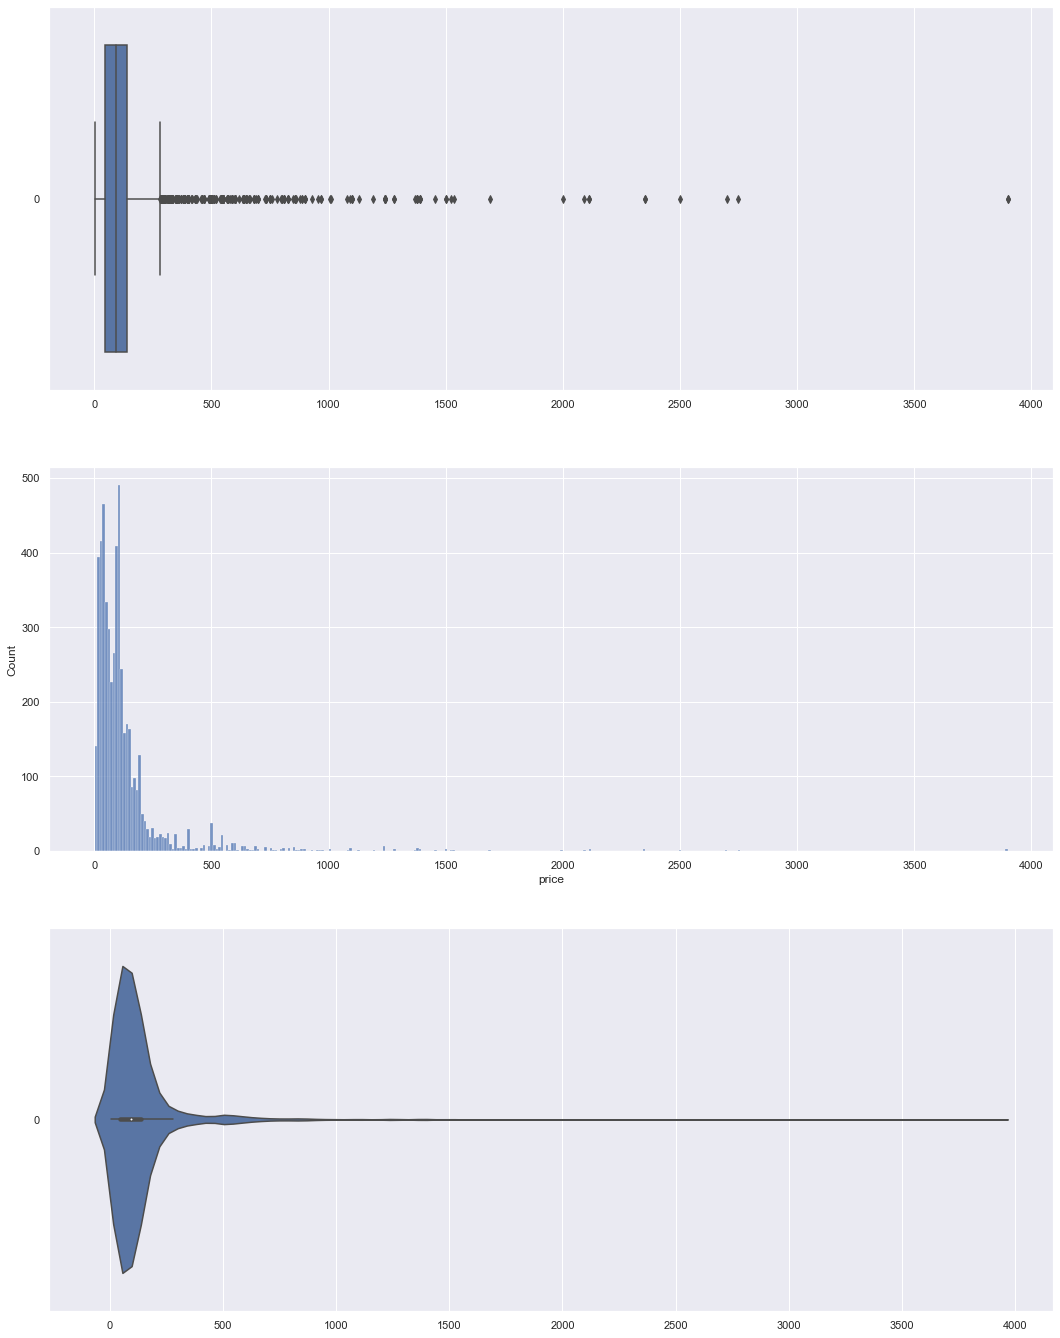

In [17]:
f, axes = plt.subplots(3, 1, figsize=(18, 24))

sb.boxplot(data=total_data['price'],orient='h',ax = axes[0])
sb.histplot(data = total_data['price'],ax = axes[1])
sb.violinplot(data = total_data['price'], orient = "h",ax = axes[2])

### Did conversion of objects to categorical variables as we are unsure of object data type interactions with certain functions, while keeping price, product_weight, product_length,etc  as a float 

In [18]:
total_data = total_data.astype('category')
total_data['price']=total_data['price'].astype('float')
total_data['freight_value']=total_data['freight_value'].astype('float')
total_data['product_weight_g']=total_data['product_weight_g'].astype('float')
total_data['product_length_cm']=total_data['product_length_cm'].astype('float')
total_data['product_height_cm']=total_data['product_height_cm'].astype('float')
total_data['product_width_cm']=total_data['product_width_cm'].astype('float')

In [19]:
total_data.dtypes
# check whether conversion of dtypes has been done correctly

freight_value                     float64
product_weight_g                  float64
product_length_cm                 float64
product_height_cm                 float64
product_width_cm                  float64
business_segment                 category
lead_type                        category
product_category_name_english    category
payment_installments             category
review_score                     category
price                             float64
dtype: object

### We want to see how the distribution of variables of business_segment looks like 

In [77]:
print("Number of Business_segments :", len(total_data["business_segment"].unique()))
print(total_data["business_segment"].value_counts())


Number of Business_segments : 28
health_beauty                      814
household_utilities                532
watches                            505
home_decor                         453
construction_tools_house_garden    305
pet                                274
audio_video_electronics            242
bed_bath_table                     208
sports_leisure                     173
car_accessories                    149
bags_backpacks                     142
toys                               126
computers                          120
home_appliances                    115
books                              111
food_supplement                    100
home_office_furniture               81
fashion_accessories                 59
phone_mobile                        57
stationery                          54
food_drink                          51
baby                                39
small_appliances                    31
music_instruments                   17
handcrafted                    

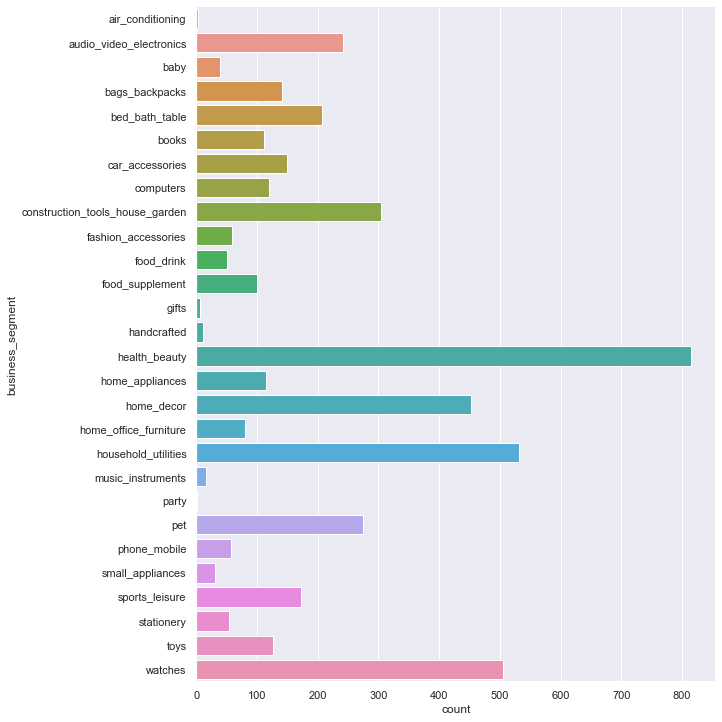

In [78]:
sb.catplot(y = "business_segment", data = total_data, kind = "count",height=10)

### Let's see how no of installment looks like 

Number of installments : 16
1     2488
2      679
3      523
4      384
5      281
8      265
10     225
6      206
7       82
9       23
12       5
18       3
20       2
15       2
24       1
14       1
Name: payment_installments, dtype: int64


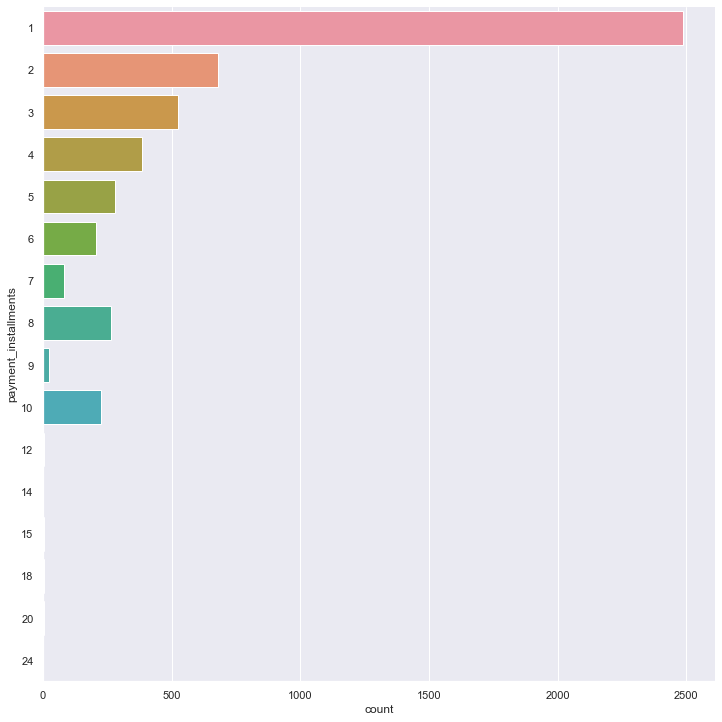

In [21]:
print("Number of installments :", len(total_data["payment_installments"].unique()))
print(total_data["payment_installments"].value_counts())
sb.catplot(y = "payment_installments", data = total_data, kind = "count",height=10)

## Cleaning of outlier data as we are selling common/normal goods and not luxury goods; keeping such data will skew the predicted price to be higher than normal 

In [22]:
# Calculate the quartiles
Q1 = total_data.price.quantile(0.25)
Q3 = total_data.price.quantile(0.75)

# Rule to identify outliers
rule = ((total_data['price'] < (Q1 - 1.5 * (Q3 - Q1))) | (total_data['price'] > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

389

In [23]:
total_data = pd.concat([total_data,rule],axis=1).reindex(total_data.index)

In [24]:
total_data.columns = ['freight_value','product_weight_g','product_length_cm','product_height_cm','product_width_cm','business_segment','lead_type','product_type','no_of_installments','review_score','price','Truth_value']

In [25]:
total_data

,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,business_segment,lead_type,product_type,no_of_installments,review_score,price,Truth_value
0,7.39,225.0,16.0,10.0,14.0,health_beauty,online_big,perfumery,1,5,10.91,False
1,15.23,200.0,16.0,16.0,16.0,health_beauty,online_small,perfumery,2,5,9.90,False
2,15.23,200.0,16.0,16.0,16.0,health_beauty,online_small,perfumery,2,5,9.90,False
3,12.79,150.0,16.0,16.0,15.0,health_beauty,online_medium,perfumery,2,5,33.50,False
4,19.95,100.0,20.0,20.0,20.0,health_beauty,online_small,perfumery,1,4,10.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5217,23.17,2150.0,30.0,5.0,20.0,books,online_big,dvds_blu_ray,1,5,83.99,False
5218,13.67,313.0,17.0,12.0,14.0,watches,online_big,market_place,5,5,143.80,False
5219,51.73,313.0,17.0,12.0,14.0,watches,online_big,market_place,8,4,143.80,False
5220,20.05,5000.0,45.0,27.0,36.0,home_decor,online_big,industry_commerce_and_business,2,5,101.19,False


In [26]:
total_data = total_data[total_data['Truth_value']!=True]

In [27]:
total_data.drop(['Truth_value'],axis=1)

,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,business_segment,lead_type,product_type,no_of_installments,review_score,price
0,7.39,225.0,16.0,10.0,14.0,health_beauty,online_big,perfumery,1,5,10.91
1,15.23,200.0,16.0,16.0,16.0,health_beauty,online_small,perfumery,2,5,9.90
2,15.23,200.0,16.0,16.0,16.0,health_beauty,online_small,perfumery,2,5,9.90
3,12.79,150.0,16.0,16.0,15.0,health_beauty,online_medium,perfumery,2,5,33.50
4,19.95,100.0,20.0,20.0,20.0,health_beauty,online_small,perfumery,1,4,10.00
...,...,...,...,...,...,...,...,...,...,...,...
5216,18.17,2150.0,30.0,5.0,20.0,books,online_big,dvds_blu_ray,1,5,83.99
5217,23.17,2150.0,30.0,5.0,20.0,books,online_big,dvds_blu_ray,1,5,83.99
5218,13.67,313.0,17.0,12.0,14.0,watches,online_big,market_place,5,5,143.80
5219,51.73,313.0,17.0,12.0,14.0,watches,online_big,market_place,8,4,143.80


## Let' see how price looks like after removal of missing data, outliers, etc. Should be nicer 

<AxesSubplot:>

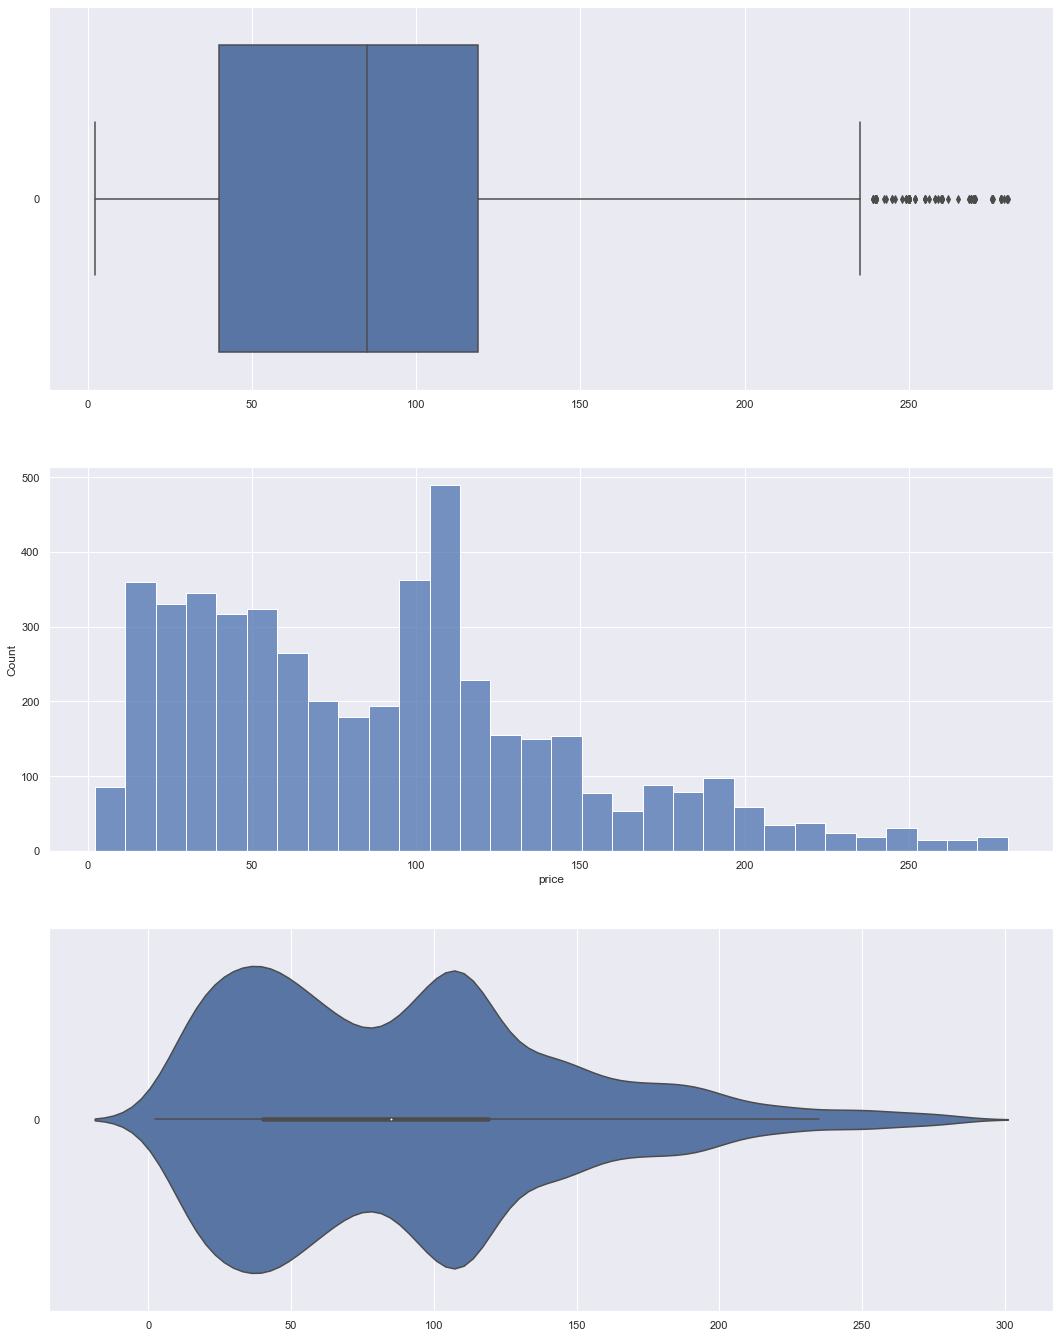

In [28]:
f, axes = plt.subplots(3, 1, figsize=(18, 24))

sb.boxplot(data=total_data['price'],orient='h',ax = axes[0])
sb.histplot(data = total_data['price'],ax = axes[1])
sb.violinplot(data = total_data['price'], orient = "h",ax = axes[2])

# Moving on to feature selection for our numeric variables, we use pearsons' correlation coefficient to judge whether they are good variables to use or not; visualisation using jointplot and heatmap 

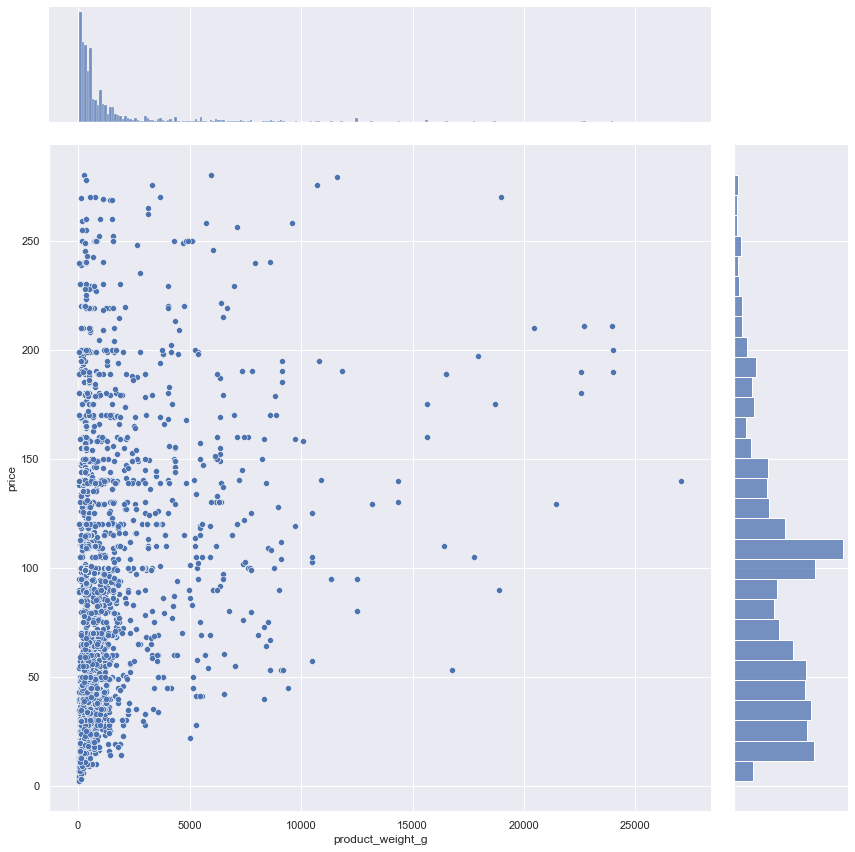

In [29]:
tempdata = pd.concat([total_data['product_weight_g'], total_data['price']], axis = 1).reindex(total_data['product_weight_g'].index)
sb.jointplot(data = tempdata, x = "product_weight_g", y = "price", height = 12)

<AxesSubplot:>

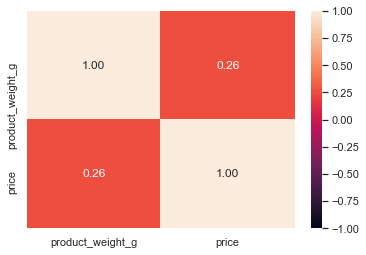

In [30]:
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

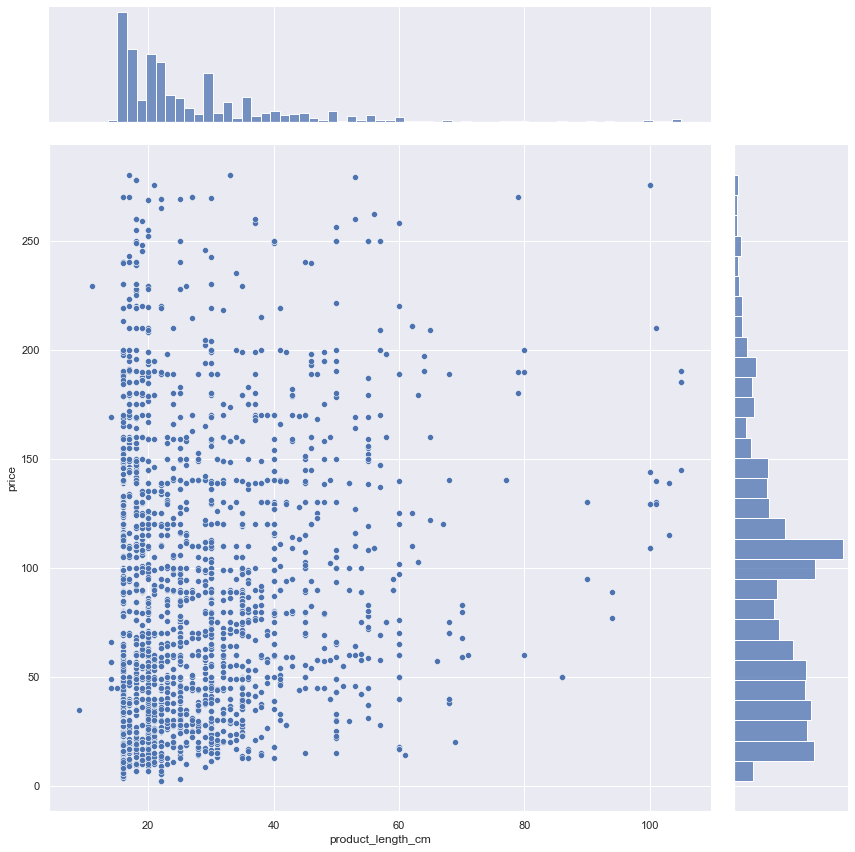

In [31]:
tempdata = pd.concat([total_data['product_length_cm'], total_data['price']], axis = 1).reindex(total_data['product_length_cm'].index)
sb.jointplot(data = tempdata, x = "product_length_cm", y = "price", height = 12)

<AxesSubplot:>

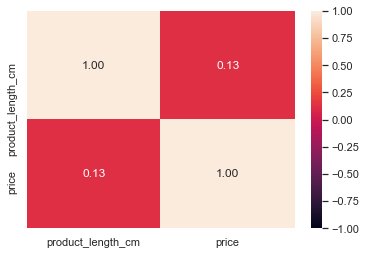

In [32]:
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

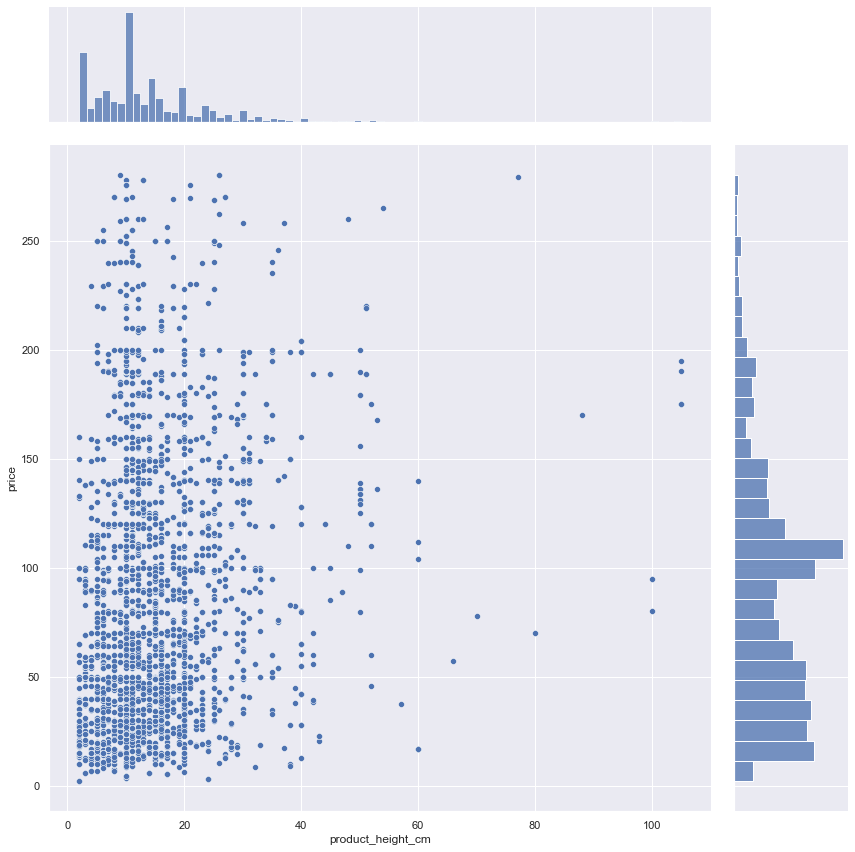

In [33]:
tempdata = pd.concat([total_data['product_height_cm'], total_data['price']], axis = 1).reindex(total_data['product_height_cm'].index)
sb.jointplot(data = tempdata, x = "product_height_cm", y = "price", height = 12)

<AxesSubplot:>

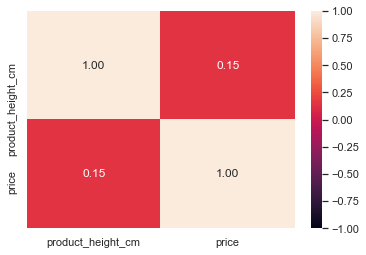

In [34]:
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

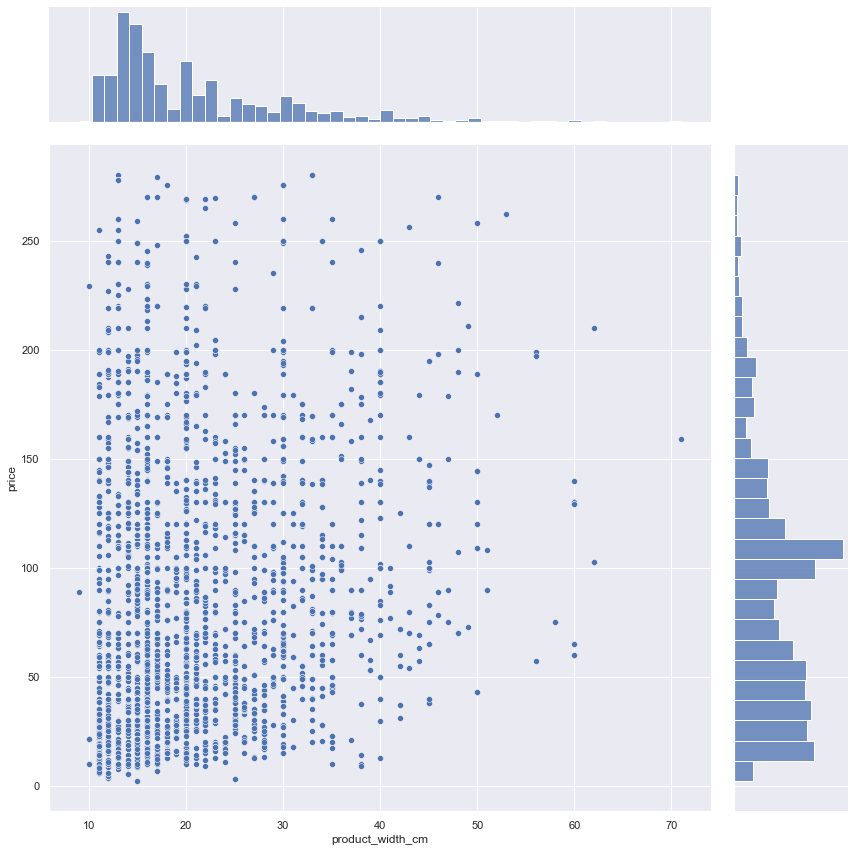

In [35]:
tempdata = pd.concat([total_data['product_width_cm'], total_data['price']], axis = 1).reindex(total_data['product_width_cm'].index)
sb.jointplot(data = tempdata, x = "product_width_cm", y = "price", height = 12)

<AxesSubplot:>

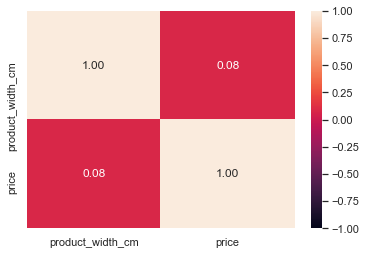

In [36]:
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

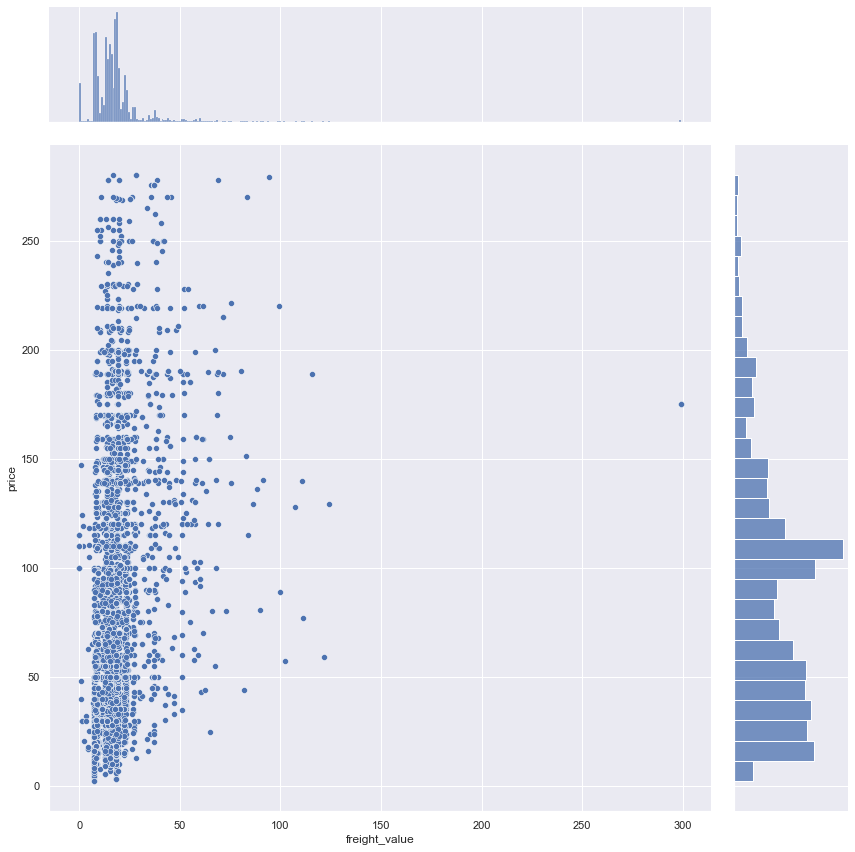

In [37]:
tempdata = pd.concat([total_data['freight_value'], total_data['price']], axis = 1).reindex(total_data['freight_value'].index)
sb.jointplot(data = tempdata, x = "freight_value", y = "price", height = 12)

<AxesSubplot:>

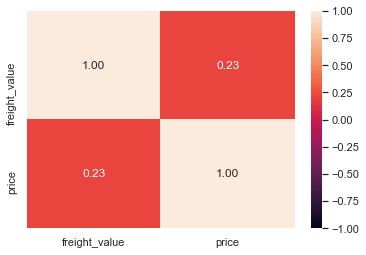

In [38]:
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Conclusion: Pearsons' correlation coefficient for all the numeric variables are pretty terrible, so we won't be using them since < +-0.7 

# Moving on to feature selection for our categorical variables using one way ANOVA - higher F value better, p value must be <0.05

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
one = pd.DataFrame(total_data[['product_type','price']])


In [41]:
lm = ols('price ~ product_type',data=one).fit()
table = sm.stats.anova_lm(lm)
print(table)

                  df        sum_sq       mean_sq          F         PR(>F)
product_type    55.0  2.104178e+06  38257.781320  13.304735  2.057188e-109
Residual      4727.0  1.359249e+07   2875.501123        NaN            NaN


In [42]:
two = pd.DataFrame(total_data[['price','business_segment']])

In [43]:
lm = ols('price ~ business_segment',data=two).fit()
table = sm.stats.anova_lm(lm)
print(table)

                      df        sum_sq       mean_sq          F         PR(>F)
business_segment    27.0  2.407325e+06  89160.180609  31.965384  4.124299e-150
Residual          4753.0  1.325741e+07   2789.272939        NaN            NaN


In [44]:
three = pd.DataFrame(total_data[['price','lead_type']])

In [45]:
lm = ols('price ~ lead_type',data=three).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq       mean_sq          F        PR(>F)
lead_type     6.0  2.954288e+05  49238.136504  15.294301  1.939101e-17
Residual   4774.0  1.536931e+07   3219.377950        NaN           NaN


In [46]:
four = pd.DataFrame(total_data[['price','no_of_installments']])

In [47]:
lm = ols('price ~ no_of_installments',data=four).fit()
table = sm.stats.anova_lm(lm)
print(table)

                        df        sum_sq       mean_sq          F  \
no_of_installments    15.0  1.410554e+06  94036.939167  31.439898   
Residual            4766.0  1.425514e+07   2991.006456        NaN   

                          PR(>F)  
no_of_installments  1.772516e-86  
Residual                     NaN  


In [48]:
five =  pd.DataFrame(total_data[['price','review_score']])
lm = ols('price ~ review_score',data=five).fit()
table = sm.stats.anova_lm(lm)
print(table)

                  df        sum_sq      mean_sq         F    PR(>F)
review_score     4.0  5.574756e+04  13936.89032  4.264375  0.001907
Residual      4776.0  1.560899e+07   3268.21432       NaN       NaN


## Since all of P value is smaller than 0.05, we don't need to reject any of them. 
## By comparing the value of F for each factors, we chose the ones with the highest F values which indicates largest variance which are "business_segment" and "no_of_installments" with about 30+ F value, to predict price.

# We want to use linear regression but these are categorical variables; therefore we need to convert them to numeric using one hot encoding. 

# We don't use integer / label encoding to prevent false sense of ordinal relationship, although we acknowledge one hot encoding has its pitfalls such as having problems dealing with data with high cardinality but luckily our categorical variables isn't that large

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import argmax


In [50]:
# arr = two["business_segment"]
# arr = np.array(arr)

In [51]:
# len(arr)

In [52]:
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(arr)
# # print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# # invert first example
# # inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# # print(inverted)

Number of Business_segments : 28
health_beauty                      814
household_utilities                532
watches                            505
home_decor                         453
construction_tools_house_garden    305
pet                                274
audio_video_electronics            242
bed_bath_table                     208
sports_leisure                     173
car_accessories                    149
bags_backpacks                     142
toys                               126
computers                          120
home_appliances                    115
books                              111
food_supplement                    100
home_office_furniture               81
fashion_accessories                 59
phone_mobile                        57
stationery                          54
food_drink                          51
baby                                39
small_appliances                    31
music_instruments                   17
handcrafted                    

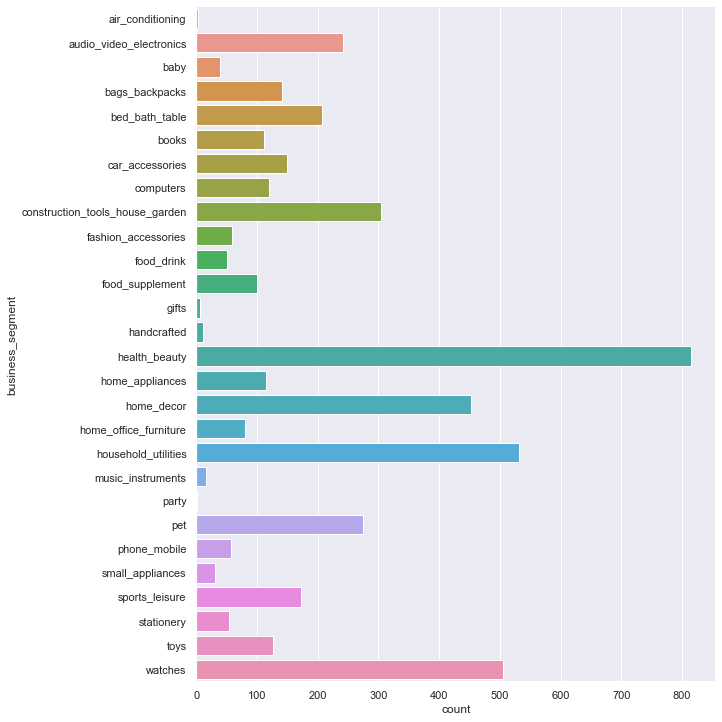

In [53]:
print("Number of Business_segments :", len(total_data["business_segment"].unique()))
print(total_data["business_segment"].value_counts())
sb.catplot(y = "business_segment", data = total_data, kind = "count",height=10)

Number of installments : 15
1     2394
2      646
3      502
4      353
5      251
8      187
6      182
10     164
7       73
9       20
18       3
15       2
12       2
24       1
14       1
20       0
Name: no_of_installments, dtype: int64


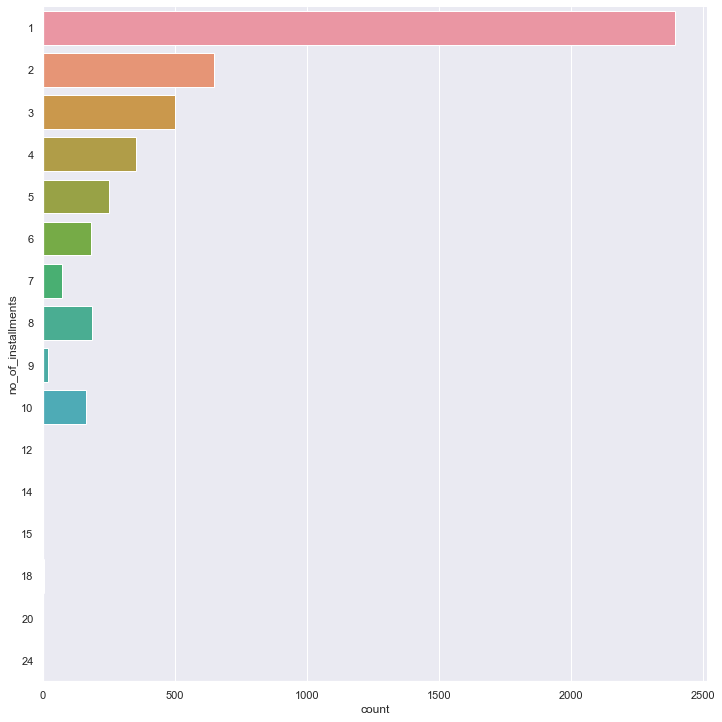

In [54]:
print("Number of installments :", len(total_data["no_of_installments"].unique()))
print(total_data["no_of_installments"].value_counts())
sb.catplot(y = "no_of_installments", data = total_data, kind = "count",height=10)

# To do one hot encoding, we use pandas function get dummies , which does the same thing. We drop_first to prevent dummy variable trap 

used as reference:https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/#:~:text=Challenges%20of%20One%2DHot%20Encoding%3A%20Dummy%20Variable%20Trap&text=The%20Dummy%20Variable%20Trap%20leads,dependency%20between%20the%20independent%20features.&text=VIF%3D1%2C%20Very%20Less%20Multicollinearity,VIF%3C5%2C%20Moderate%20Multicollinearity

In [55]:
import pandas as pd
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [56]:
X = total_data[["business_segment","no_of_installments"]]
Y = total_data['price']

In [57]:
X = pd.get_dummies(X, drop_first=True)

In [58]:
X

,business_segment_audio_video_electronics,business_segment_baby,business_segment_bags_backpacks,business_segment_bed_bath_table,business_segment_books,business_segment_car_accessories,business_segment_computers,business_segment_construction_tools_house_garden,business_segment_fashion_accessories,business_segment_food_drink,...,no_of_installments_7,no_of_installments_8,no_of_installments_9,no_of_installments_10,no_of_installments_12,no_of_installments_14,no_of_installments_15,no_of_installments_18,no_of_installments_20,no_of_installments_24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5217,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5219,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import explained_variance_score


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

linreg = LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
linreg.fit(X_train, Y_train)
predicted = linreg.predict(X_test)
predicted = pd.DataFrame(predicted)
predicted.columns =["predicted price"]
predicted
X_test = X_test.reset_index()
Y_test = Y_test.reset_index()
Y_test = Y_test["price"]
results = pd.concat([predicted,Y_test], axis=1).reindex(predicted.index)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  126.57647456454859
Coefficients 	: a =  [ -40.5383891    -6.04929408  -40.65785234  -61.21653998  -64.43047838
  -49.54176411  -54.50855331  -66.79565342  -19.61625888  -47.32984065
  -41.26757744  -52.2780665   -47.09333481  -48.79341289  -13.28665585
  -61.31551268  -16.64559072  -69.0156469   -41.04476422 -111.58647456
  -48.47499045  -42.50251739  -41.45432332  -55.22762721  -55.85607251
  -88.42928206   -5.42527309   13.59804781   12.42352544   21.68488774
   17.85564655   22.80341336   20.38120133   52.94310932   29.47196697
   48.11358597    8.09398543  116.61018129   78.46507049   36.43271289
    0.          172.86528955]


#### MSE AND R^2 COMPUTED: 

In [60]:
MSE(results["predicted price"],results["price"])

2660.690643761645

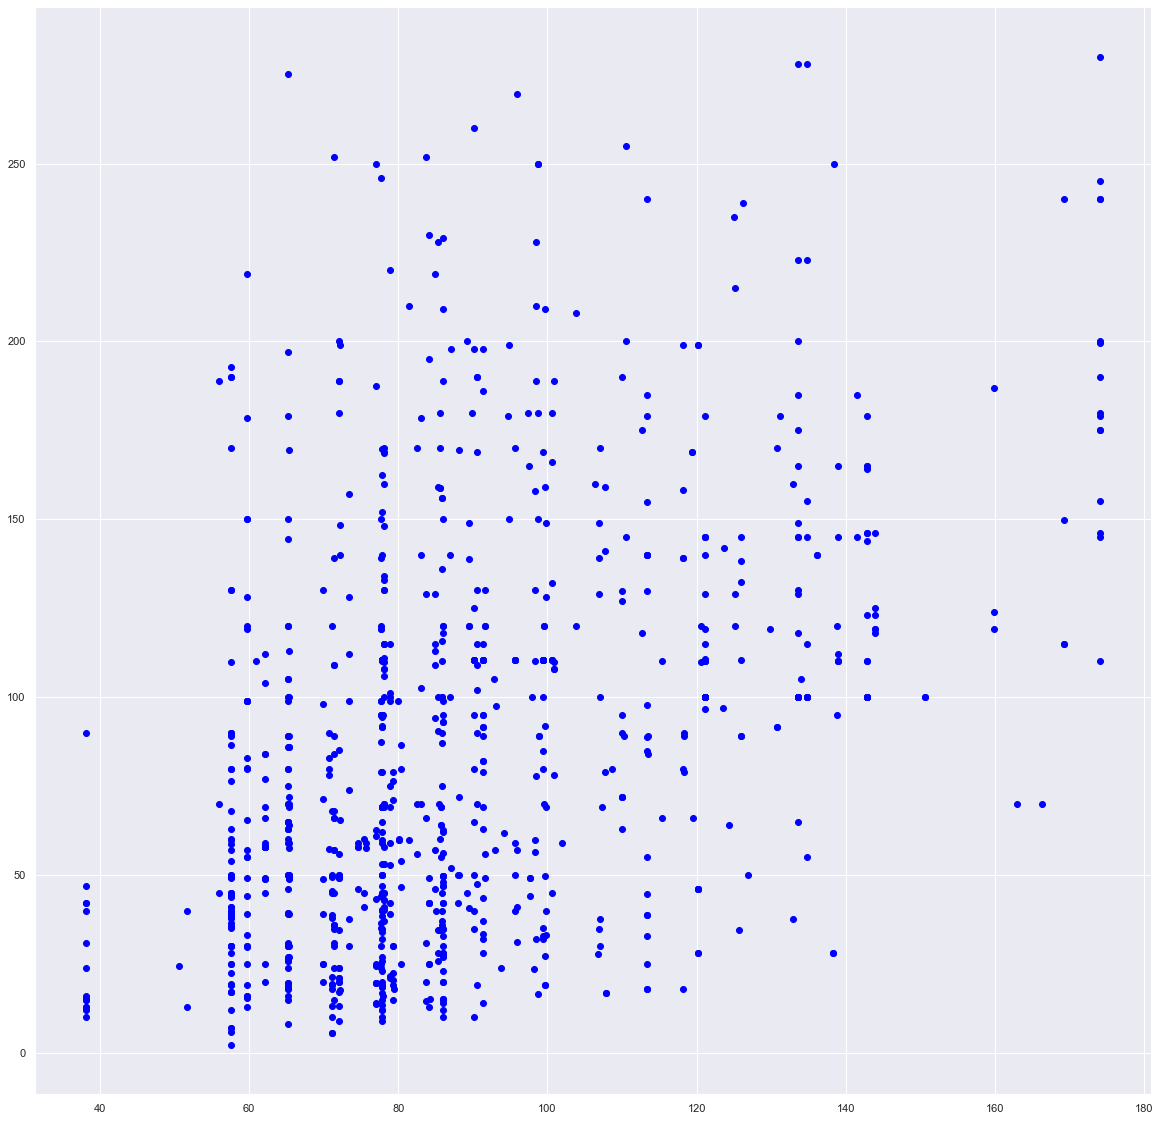

In [61]:
f = plt.figure(figsize=(20,20))

plt.scatter(results["predicted price"],results["price"], color = "blue")

In [62]:
explained_variance_score(Y_test,predicted)

0.19050799400215146

In [63]:
results.describe()

,predicted price,price
count,957.000000,957.000000
mean,88.851236,87.716144
std,26.791163,57.347271
min,38.147193,2.200000
25%,71.348847,40.990000
50%,83.116608,79.900000
75%,99.636133,118.000000
max,174.094311,280.100000


In [64]:
results

,predicted price,price
0,98.461611,189.00
1,77.783062,18.38
2,85.308897,90.50
3,86.038085,20.00
4,73.378869,157.00
...,...,...
952,113.473521,89.00
953,77.783062,94.30
954,77.783062,39.90
955,86.038085,30.00


<AxesSubplot:>

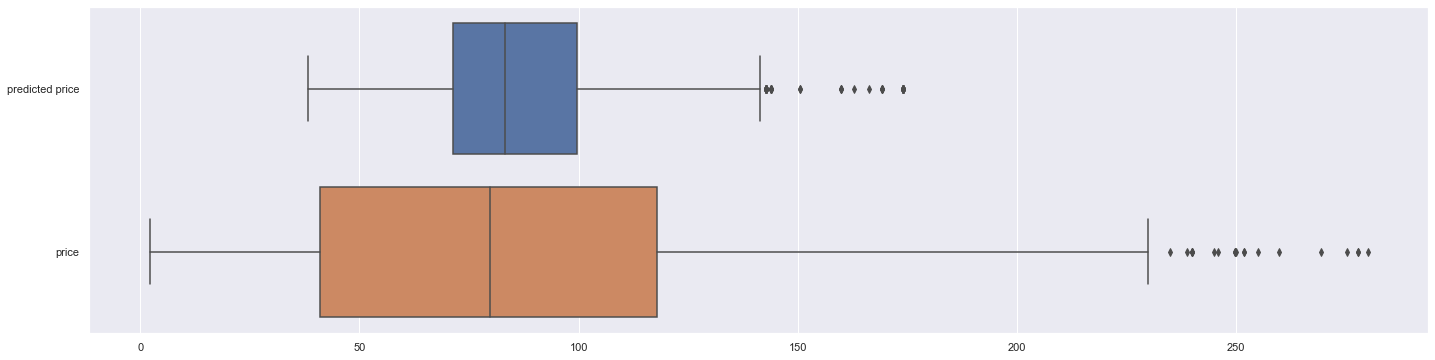

In [65]:
f = plt.figure(figsize=(24,6))

sb.boxplot(data=results,orient='h')

<AxesSubplot:>

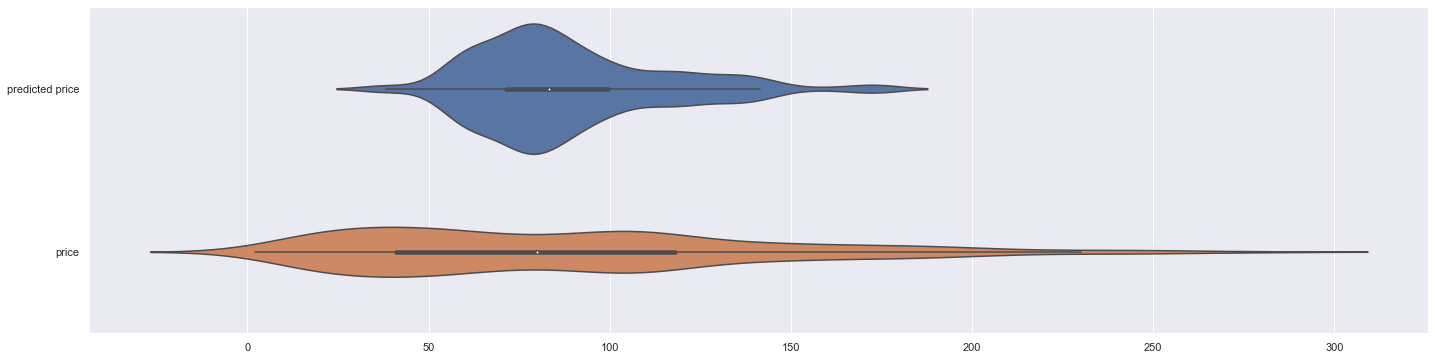

In [66]:
f = plt.figure(figsize=(24,6))
sb.violinplot(data=results,orient='h')

<AxesSubplot:>

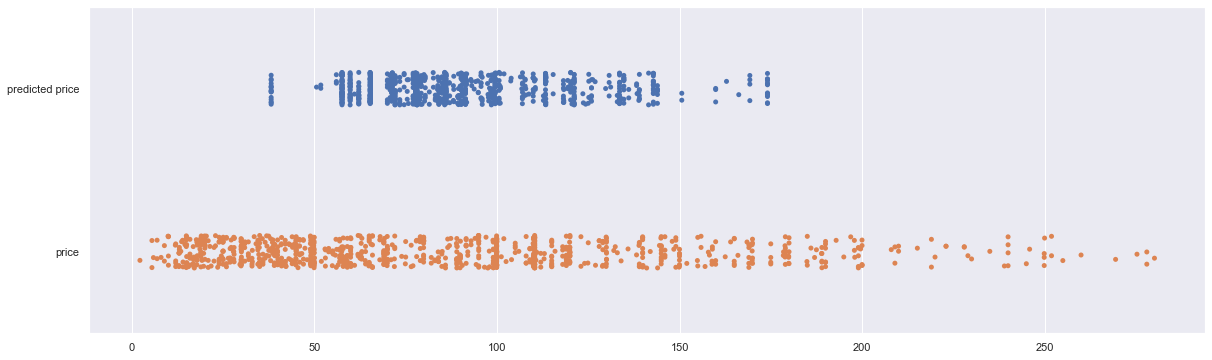

In [67]:
f = plt.figure(figsize=(20,6))
sb.stripplot(data=results,orient='h')


In [68]:
results = pd.concat([results,X_test], axis=1).reindex(predicted.index)

In [69]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   predicted price                                   957 non-null    float64
 1   price                                             957 non-null    float64
 2   index                                             957 non-null    int64  
 3   business_segment_audio_video_electronics          957 non-null    uint8  
 4   business_segment_baby                             957 non-null    uint8  
 5   business_segment_bags_backpacks                   957 non-null    uint8  
 6   business_segment_bed_bath_table                   957 non-null    uint8  
 7   business_segment_books                            957 non-null    uint8  
 8   business_segment_car_accessories                  957 non-null    uint8  
 9   business_segment_comp

 ## we decided we can either go do business in health_beauty or backpacks, let's take a look at the stats of these two industries

In [70]:
bb = results[["predicted price","price","business_segment_bags_backpacks"]]
bb = pd.DataFrame(bb)
bb.drop(bb.loc[bb["business_segment_bags_backpacks"]==0].index, inplace=True)

In [71]:
bb

,predicted price,price,business_segment_bags_backpacks
62,98.342148,110.00,1
115,115.390589,65.90,1
118,85.918622,155.90,1
141,99.516670,119.90,1
145,85.918622,110.00,1
161,85.918622,155.90,1
247,85.918622,86.99,1
288,85.918622,99.99,1
330,85.918622,99.90,1
343,85.918622,89.99,1


In [72]:
hb = results[["predicted price","price","business_segment_health_beauty"]] 
hb = pd.DataFrame(hb)
hb.drop(hb.loc[hb["business_segment_health_beauty"]==0].index, inplace=True)
hb

,predicted price,price,business_segment_health_beauty
1,77.783062,18.38,1
25,90.206587,197.90,1
31,90.206587,110.32,1
33,100.586475,132.00,1
35,91.381109,95.00,1
...,...,...,...
910,95.638708,59.00,1
917,125.896648,144.90,1
945,77.783062,110.32,1
953,77.783062,94.30,1


In [73]:
hb.describe()

,predicted price,price,business_segment_health_beauty
count,152.000000,152.000000,152.0
mean,88.558143,86.594342,1.0
std,13.104737,45.441851,0.0
min,77.783062,8.900000,1.0
25%,77.783062,46.400000,1.0
50%,90.206587,95.000000,1.0
75%,95.638708,110.320000,1.0
max,130.726171,259.990000,1.0


In [74]:
bb.describe()

,predicted price,price,business_segment_bags_backpacks
count,29.000000,29.000000,29.0
mean,98.212228,96.646552,1.0
std,16.301257,35.480508,0.0
min,85.918622,35.900000,1.0
25%,85.918622,69.900000,1.0
50%,98.342148,99.990000,1.0
75%,99.516670,119.900000,1.0
max,138.861732,157.900000,1.0


<AxesSubplot:>

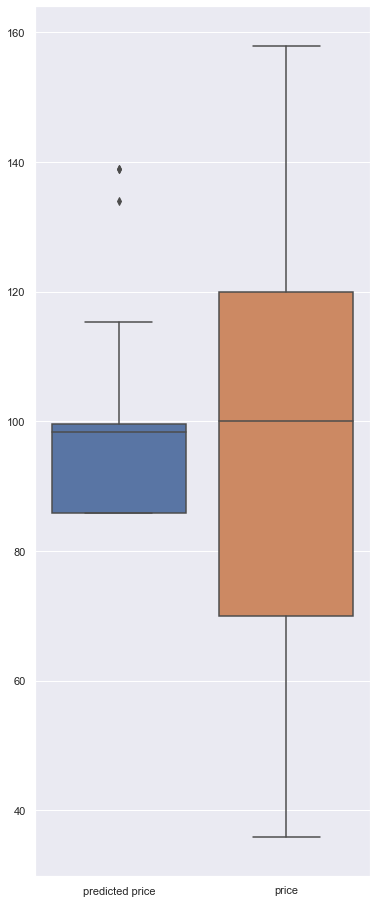

In [75]:
f = plt.figure(figsize=(6,16))

sb.boxplot(data=bb[["predicted price","price"]])

<AxesSubplot:>

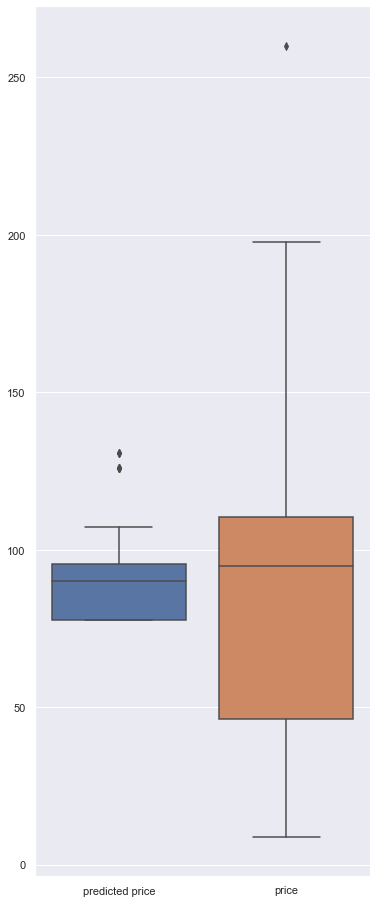

In [76]:
f = plt.figure(figsize=(6,16))

sb.boxplot(data=hb[["predicted price","price"]])

# Based on our current scenario, it would be better for us to enter the health_beauty industry instead since we can undercut our rivals who are selling similar products. Logically, since our products are substitutes for one another, we should be able to get good business! 



# In conlusion, we are able to come to a decision thanks to data science! Our real world problem has been answered :) 